# ML_ python introduction & binary classifiers

In [1]:
# importing packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV

### Preparing datas

Cervical Cancer Risk Factors for Biopsy: This Dataset is Obtained from UCI Repository and kindly acknowledged!

This file contains a List of Risk Factors for Cervical Cancer leading to a Biopsy Examination!

About 11,000 new cases of invasive cervical cancer are diagnosed each year in the U.S. However, the number of new cervical cancer cases has been declining steadily over the past decades. Although it is the most preventable type of cancer, each year cervical cancer kills about 4,000 women in the U.S. and about 300,000 women worldwide. In the United States, cervical cancer mortality rates plunged by 74% from 1955 - 1992 thanks to increased screening and early detection with the Pap test. AGE Fifty percent of cervical cancer diagnoses occur in women ages 35 - 54, and about 20% occur in women over 65 years of age. The median age of diagnosis is 48 years. About 15% of women develop cervical cancer between the ages of 20 - 30. Cervical cancer is extremely rare in women younger than age 20. However, many young women become infected with multiple types of human papilloma virus, which then can increase their risk of getting cervical cancer in the future. Young women with early abnormal changes who do not have regular examinations are at high risk for localized cancer by the time they are age 40, and for invasive cancer by age 50. SOCIOECONOMIC AND ETHNIC FACTORS Although the rate of cervical cancer has declined among both Caucasian and African-American women over the past decades, it remains much more prevalent in African-Americans -- whose death rates are twice as high as Caucasian women. Hispanic American women have more than twice the risk of invasive cervical cancer as Caucasian women, also due to a lower rate of screening. These differences, however, are almost certainly due to social and economic differences. Numerous studies report that high poverty levels are linked with low screening rates. In addition, lack of health insurance, limited transportation, and language difficulties hinder a poor woman’s access to screening services. HIGH SEXUAL ACTIVITY Human papilloma virus (HPV) is the main risk factor for cervical cancer. In adults, the most important risk factor for HPV is sexual activity with an infected person. Women most at risk for cervical cancer are those with a history of multiple sexual partners, sexual intercourse at age 17 years or younger, or both. A woman who has never been sexually active has a very low risk for developing cervical cancer. Sexual activity with multiple partners increases the likelihood of many other sexually transmitted infections (chlamydia, gonorrhea, syphilis).Studies have found an association between chlamydia and cervical cancer risk, including the possibility that chlamydia may prolong HPV infection. FAMILY HISTORY Women have a higher risk of cervical cancer if they have a first-degree relative (mother, sister) who has had cervical cancer. USE OF ORAL CONTRACEPTIVES Studies have reported a strong association between cervical cancer and long-term use of oral contraception (OC). Women who take birth control pills for more than 5 - 10 years appear to have a much higher risk HPV infection (up to four times higher) than those who do not use OCs. (Women taking OCs for fewer than 5 years do not have a significantly higher risk.) The reasons for this risk from OC use are not entirely clear. Women who use OCs may be less likely to use a diaphragm, condoms, or other methods that offer some protection against sexual transmitted diseases, including HPV. Some research also suggests that the hormones in OCs might help the virus enter the genetic material of cervical cells. HAVING MANY CHILDREN Studies indicate that having many children increases the risk for developing cervical cancer, particularly in women infected with HPV. SMOKING Smoking is associated with a higher risk for precancerous changes (dysplasia) in the cervix and for progression to invasive cervical cancer, especially for women infected with HPV. IMMUNOSUPPRESSION Women with weak immune systems, (such as those with HIV / AIDS), are more susceptible to acquiring HPV. Immunocompromised patients are also at higher risk for having cervical precancer develop rapidly into invasive cancer. DIETHYLSTILBESTROL (DES) From 1938 - 1971, diethylstilbestrol (DES), an estrogen-related drug, was widely prescribed to pregnant women to help prevent miscarriages. The daughters of these women face a higher risk for cervical cancer. DES is no longer prsecribed.

In [2]:
# importing datas
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [10]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


First statistic analysis of dataset

In [4]:
stat_analysis = ProfileReport(data)

In [5]:
stat_analysis

In [6]:
# variable output (target) 
data['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

In [7]:
# detecting and dropping one-class columns
col_todrop = []
for col in data.columns:
    
    if data[data[col] != '?'][col].nunique() < 2:
        col_todrop.append(col)
# dropping
data.drop(columns=col_todrop, axis=1, inplace=True)

In [9]:
# replace ? into NaN :
tonan = {'?': np.NaN}
data.replace(tonan, inplace=True)

In [13]:
data['STDs: Time since last diagnosis'].isnull().sum()/len(data)

0.9172494172494172

In [18]:
# drop columns with > 15% of NaN :
col_todrop1 = []
for col in data.columns:
    p_nan = data[col].isnull().sum()/len(data)
    if p_nan > 0.1:
        col_todrop1.append(col)
        print(col)
# dropping
data.drop(columns=col_todrop1, axis=1, inplace=True)

In [19]:
# dropping rows with NaNs
data.dropna(inplace=True)

In [29]:
# controling target
data['Dx:Cancer'].value_counts()

0    648
1     17
Name: Dx:Cancer, dtype: int64

In [21]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [30]:
# data consistency
data = data[data['First sexual intercourse'].astype(float) >= 12]
data.drop(columns=['Smokes (packs/year)'], axis=1, inplace=True)

### Trying Decision tree

#### With all features

In [31]:
# model variables definitions
Y = data['Dx:Cancer']
X = data.drop(labels=['Dx:Cancer'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# calling decisiontree classifier
clf = DecisionTreeClassifier()
#criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]

# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)

In [43]:
print(auc_)

0.8


In [39]:
print((data['Dx:Cancer'] == 1).sum()/len(data))
print(Y_test.value_counts()[1]/len(Y_test))

0.02556390977443609
0.029940119760479042


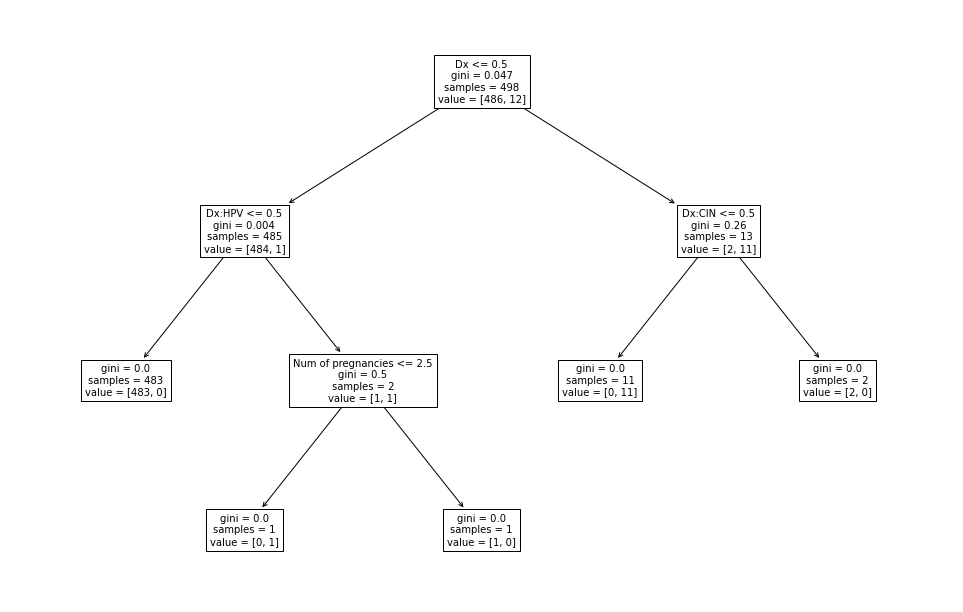

In [32]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Without HPV & "Dx"

Dropping high correlated feature

In [40]:
# dropping "Dx:HPV"
data.drop(columns=['Dx:HPV', 'Dx'], axis=1, inplace=True)

In [50]:
rs = range(100)
auc_list = []
for random_state in rs:
    # model variables definitions
    Y = data['Dx:Cancer']
    X = data.drop(labels=['Dx:Cancer'], axis=1)

    # splitting into train test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=random_state)

    # calling decisiontree classifier
    clf = DecisionTreeClassifier()
    #criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
    # fitting on data
    clf = clf.fit(X_train, Y_train)
    # estimating on test
    estimate = clf.predict_proba(X_test)[:,1]
    # building AUC
    fpr, tpr, _ = roc_curve(Y_test,  estimate)
    auc_wthout_hpv = auc(fpr, tpr)
    auc_list.append(auc_wthout_hpv)

print(np.mean(auc_list))

0.6063568473250681


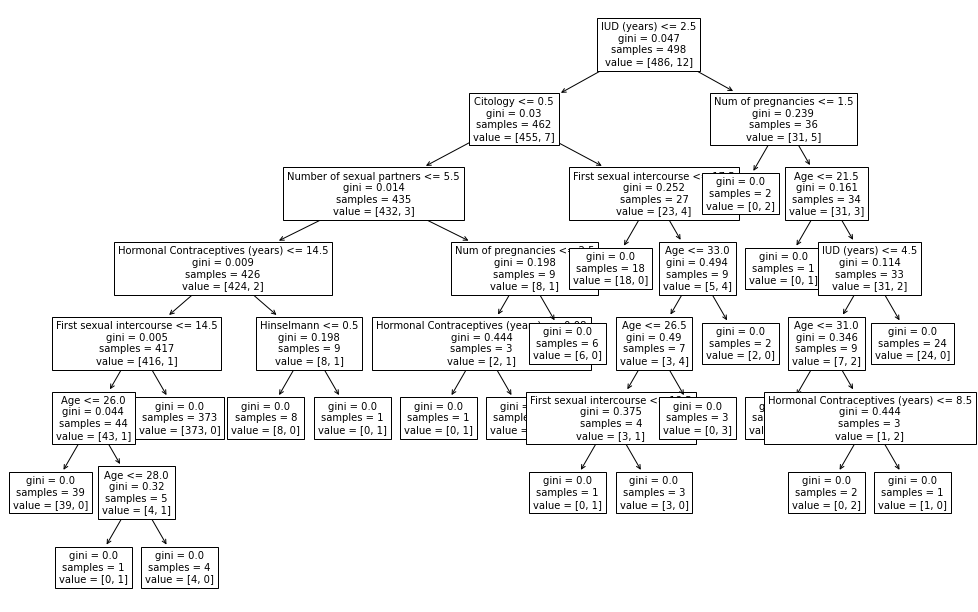

In [45]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Hyperparameters optim : gridsearch

In [61]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 0.07, 'random_state': 42}
best auc: 0.7748590556730091


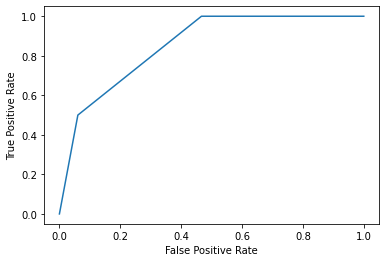

In [64]:
# calling classifier
clf_best = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_split = 0.07, random_state= 42)

# model variables definitions
Y = data['Dx:Cancer']
X = data.drop(labels=['Dx:Cancer'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=30)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# getting roc curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [65]:
# auc
auc(fpr, tpr)

0.853030303030303

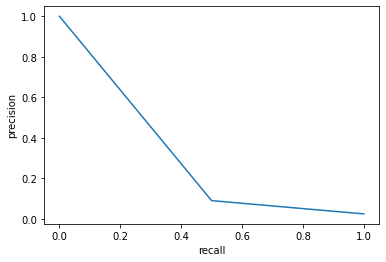

In [68]:
precision, recall, _ = precision_recall_curve(Y_test,  estimate_best)

# getting pr curve

plt.plot(recall, precision)

plt.ylabel('precision')
plt.xlabel('recall')
plt.show()


In [10]:
# plotting tree


### Solving unbalanced targert problem

#### Undersampling

In [11]:
# plotting tree


### Trying Random Forest

#### Hyperparameters optim : gridsearch

### Trying Logistic regression

#### Hyperparameters optim : gridsearch